# Exploratory Data Analysis and PCA for 'digits' dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

digits = load_digits() #loads the dataset

digits.keys()  #prints dictionary keys of 'digits' dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
feature_df = pd.DataFrame(digits.feature_names)
feature_df

0
0   pixel_0_0
1   pixel_0_1
2   pixel_0_2
3   pixel_0_3
4   pixel_0_4
..        ...
59  pixel_7_3
60  pixel_7_4
61  pixel_7_5
62  pixel_7_6
63  pixel_7_7

[64 rows x 1 columns]

In [4]:
target_df = pd.DataFrame(digits.target_names)
target_df

0
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9

In [5]:
data_df = pd.DataFrame(digits.data)
data_df

0    1     2     3     4     5    6    7    8    9   ...   54   55  \
0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   

       56   57   58    59    60    61   62   63  
0     0.0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1     0.0  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2     0.0  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3     0.0  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4     0.0  0.0  0.0   2.0  16.0   4.0  0.0  0.0  
...   ...  ...  ...   ...   ...   ...  ...  ...  
1792  0.0  0.0  2.0  14.0  15.0   9.0  0.0  0.0  
1793  0.0  0.0  6.0  16.0  14.0   6.0  0.0  0.0  
1794  0.0  0.0  2.0   9.0  13.0   6.0  0.0  0.0  
1795  0.0  0.0  5.0  12.0  16.0  12.0  0.0  0.0  
1796  0.0  1.0  8.0  12.0  14.0  12.0  1.0  0.0  

[1797 rows x 64 columns]

## In the 'data_df', we can observe that it depicts an 8x8 digit image, and the data represents pixel values.

Each value in the data represents pixel intensity.'0.0'(lowest value) = lightest color intensity (white);  '16.0' (highest value) = darkest color intensity (black)


In [6]:
#  dataframe for feature names
feature_names = [f'pixel_{i}' for i in range(digits.data.shape[1])]
data_df = pd.DataFrame(digits.data, columns = feature_names)
data_df['target'] = digits.target

print(data_df.head())

   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0      0.0      0.0      5.0     13.0      9.0      1.0      0.0      0.0   
1      0.0      0.0      0.0     12.0     13.0      5.0      0.0      0.0   
2      0.0      0.0      0.0      4.0     15.0     12.0      0.0      0.0   
3      0.0      0.0      7.0     15.0     13.0      1.0      0.0      0.0   
4      0.0      0.0      0.0      1.0     11.0      0.0      0.0      0.0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0      0.0      0.0  ...       0.0       0.0       0.0       6.0      13.0   
1      0.0      0.0  ...       0.0       0.0       0.0       0.0      11.0   
2      0.0      0.0  ...       0.0       0.0       0.0       0.0       3.0   
3      0.0      8.0  ...       0.0       0.0       0.0       7.0      13.0   
4      0.0      0.0  ...       0.0       0.0       0.0       0.0       2.0   

   pixel_60  pixel_61  pixel_62  pixel_63  target  
0      10.0     

# Boxplot

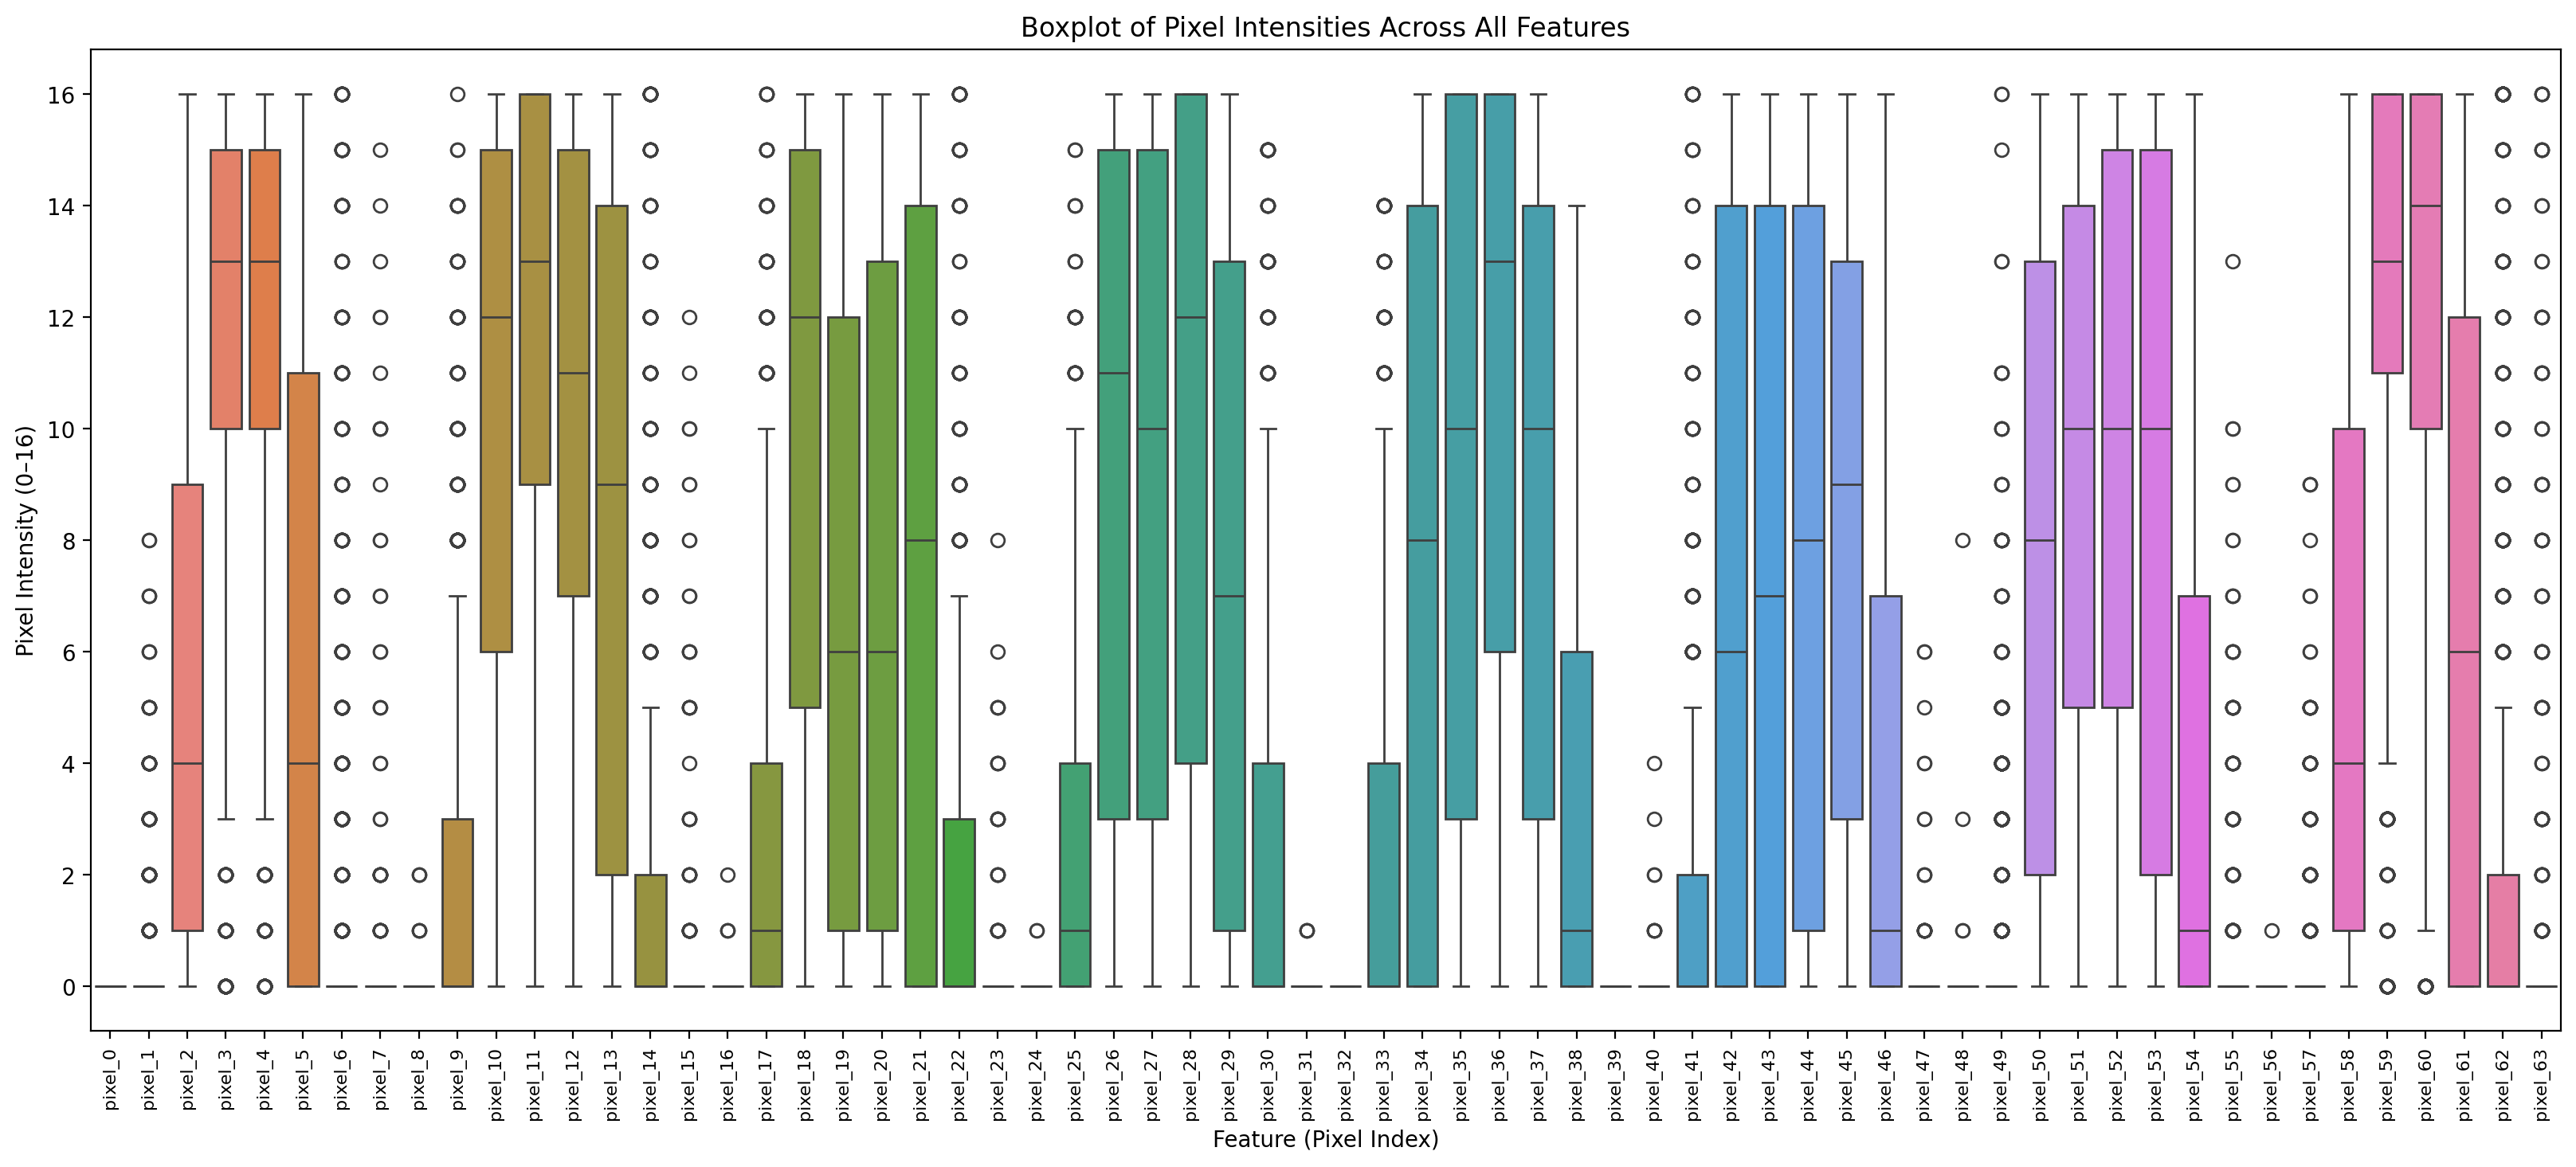

In [7]:
# Plot boxplot
plt.figure(figsize = (20, 8), dpi = 200)
sns.boxplot(data = data_df.iloc[:, :-1]) 
plt.xlabel('Feature (Pixel Index)')
plt.ylabel('Pixel Intensity (0–16)')
plt.title('Boxplot of Pixel Intensities Across All Features')
plt.xticks(rotation = 90, fontsize = 8)
plt.show()

## Boxplot Interpretation:

The boxplot reveals a clear structure in how the 8x8 pixel grid is organized. Pixels are arranged sequentially in rows (0-7, 8-15, 16-23, and so on). We can see that the edge pixels from the first and last rows/columns mostly stay at zero intensity. In contrast, the pixels in the middle regions display higher intensities and variability. This makes sense for handwritten digits that naturally occupy the central region of the image, while the edges are mostly white or blank.

# Histogram

Number of features: 64


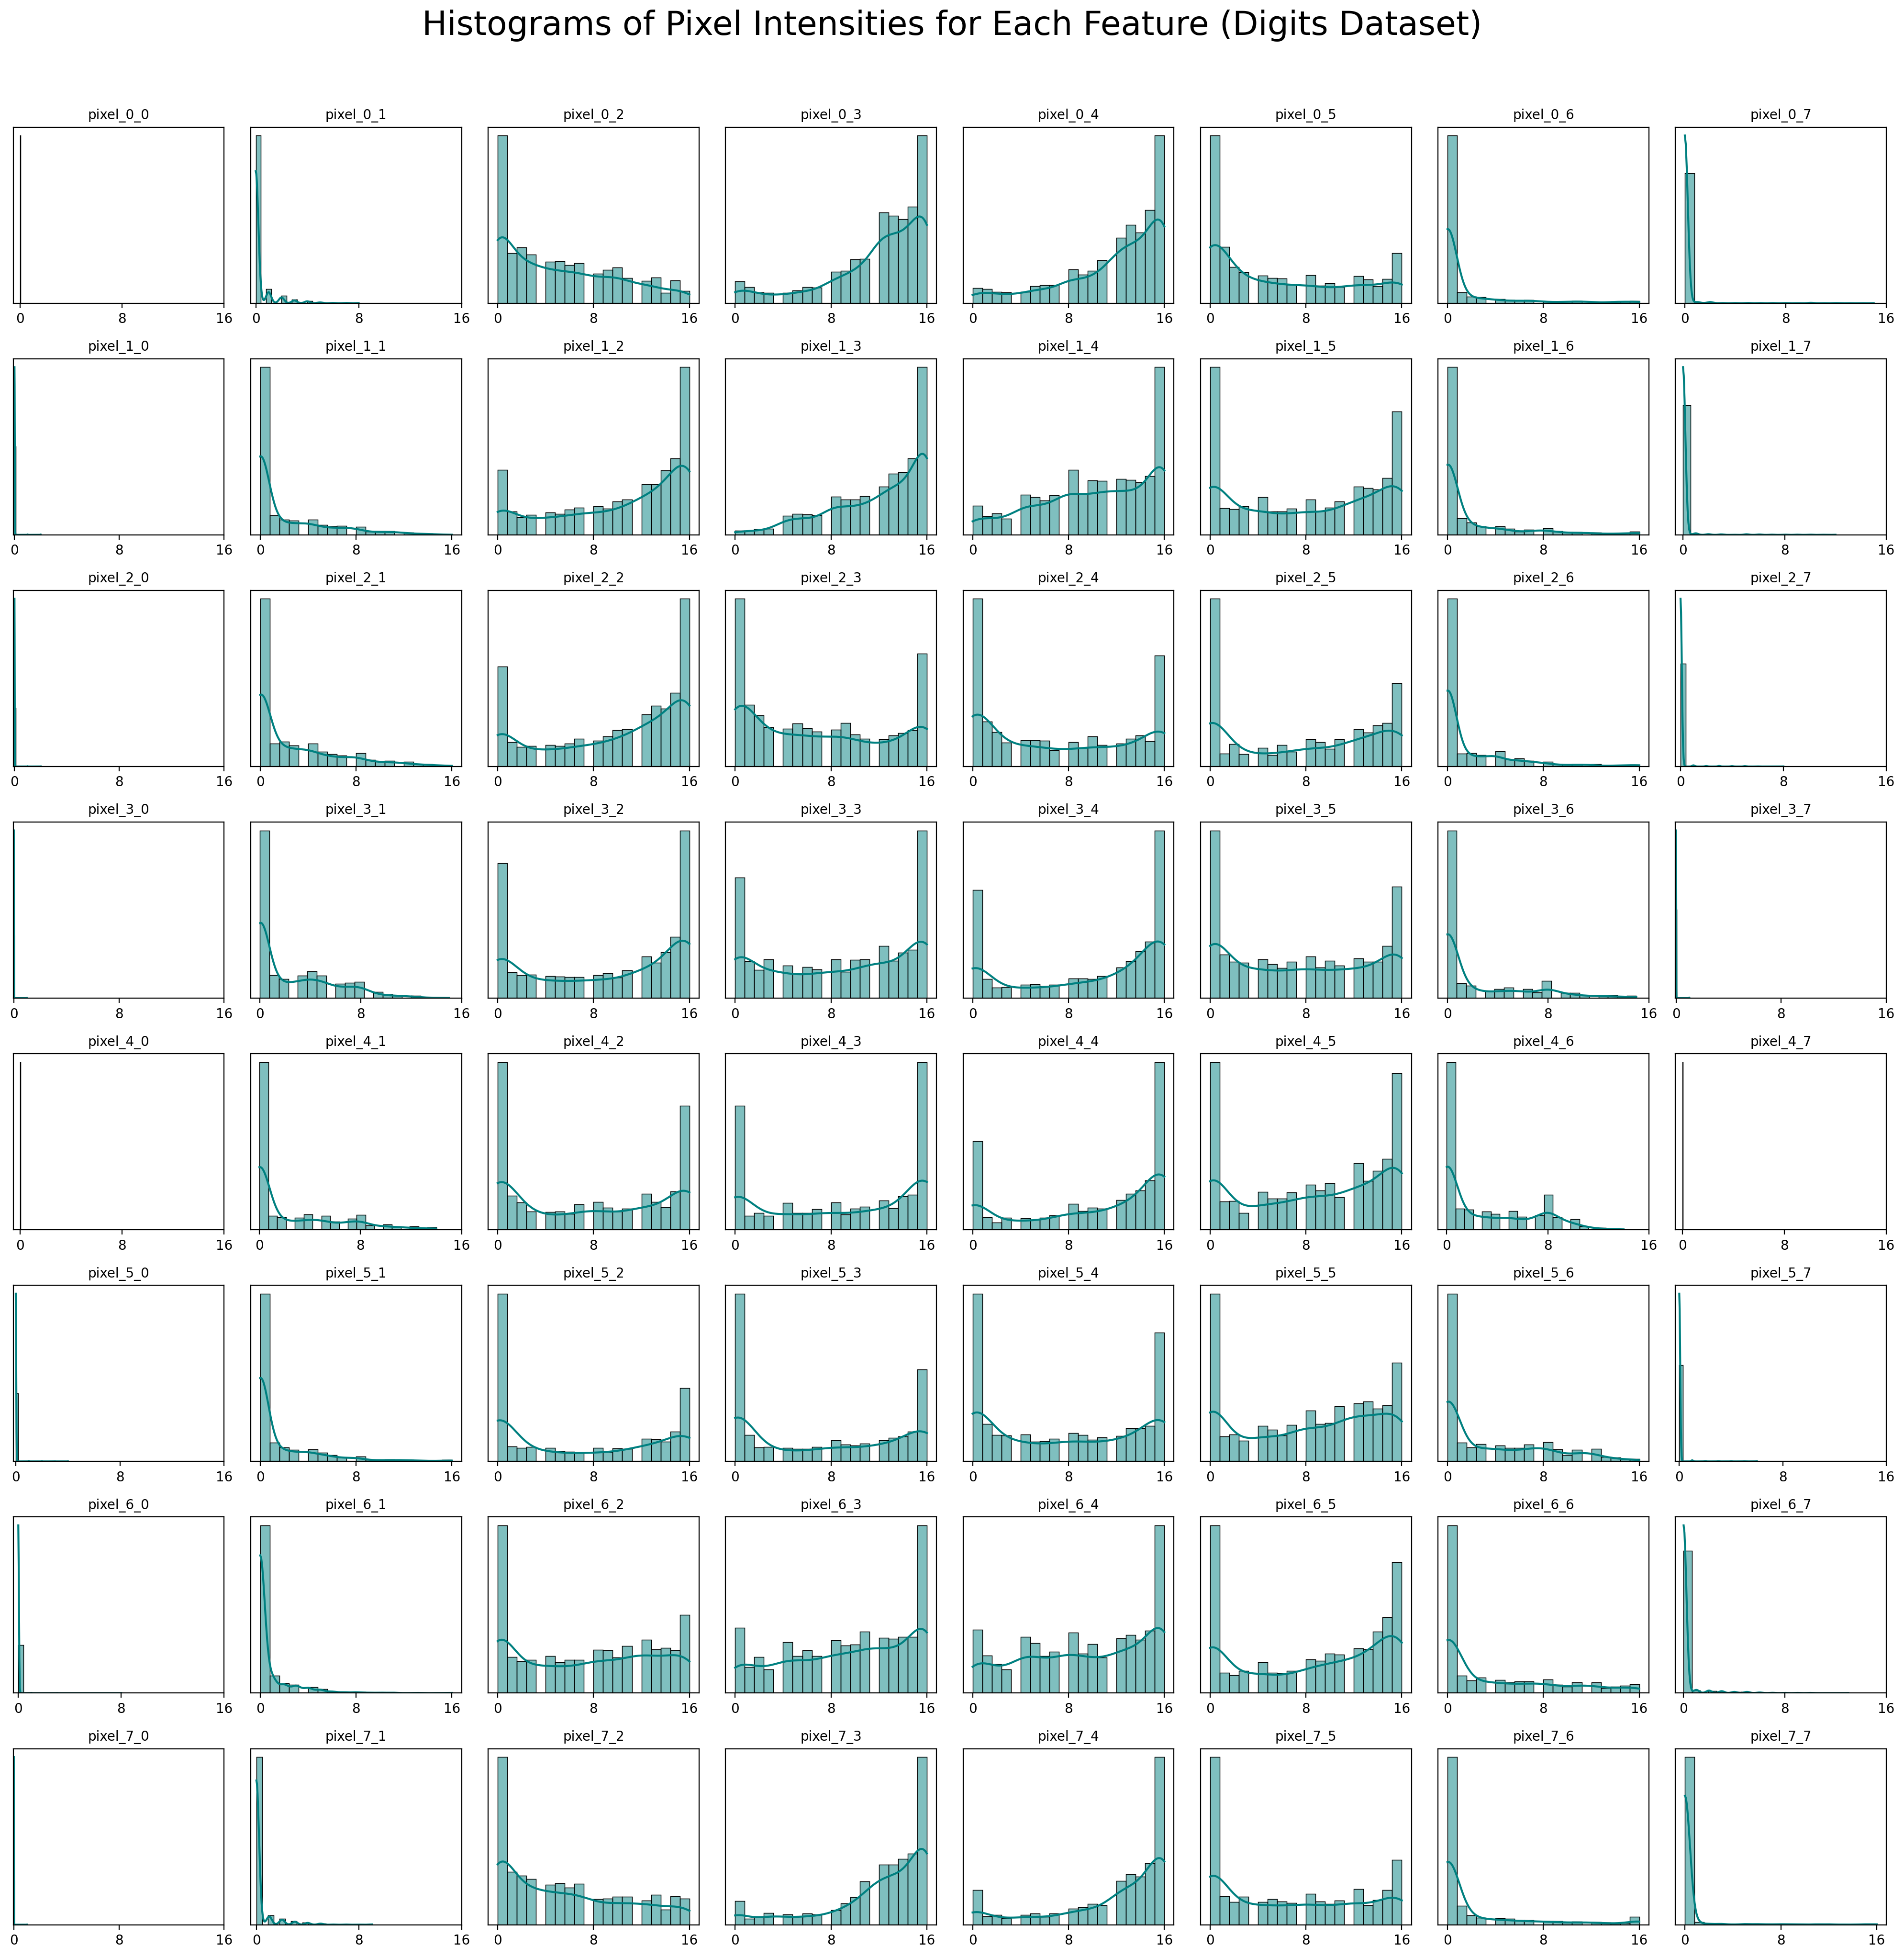

In [8]:
data_df = pd.DataFrame(digits.data, columns=digits.feature_names)

print("Number of features:", len(digits.feature_names))
plt.figure(figsize=(20, 20), dpi=200)
plt.suptitle("Histograms of Pixel Intensities for Each Feature (Digits Dataset)", fontsize=25, y=1.02)

for i, feature in enumerate(digits.feature_names):
    plt.subplot(8, 8, i + 1)
    sns.histplot(data_df[feature], bins=20, color='teal', kde=True)
    plt.title(f'{feature}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks([])
    plt.yticks([])
    plt.xticks([0, 8, 16], fontsize=10)

    
plt.tight_layout()
plt.show()

## Histogram Interpretation
Looking at the histograms above, we can already see the shape of where the digits get written. The histograms are arranged in an 8x8 grid, matching the actual pixel positions in the images. The corner and edge pixels (such as pixel_0_0, pixel_0_7, pixel_7_0, pixel_7_7, etc) show that their distributions are heavily concentrated at zero intensity (blank space). 

However, as we look toward the center of the grid, the histograms spread out across the full range from 0 to 16. The variance patterns clearly indicate that informative features (for digit classification) are concentrated in the central region of the image grid.


# Pairwise Scatterplot

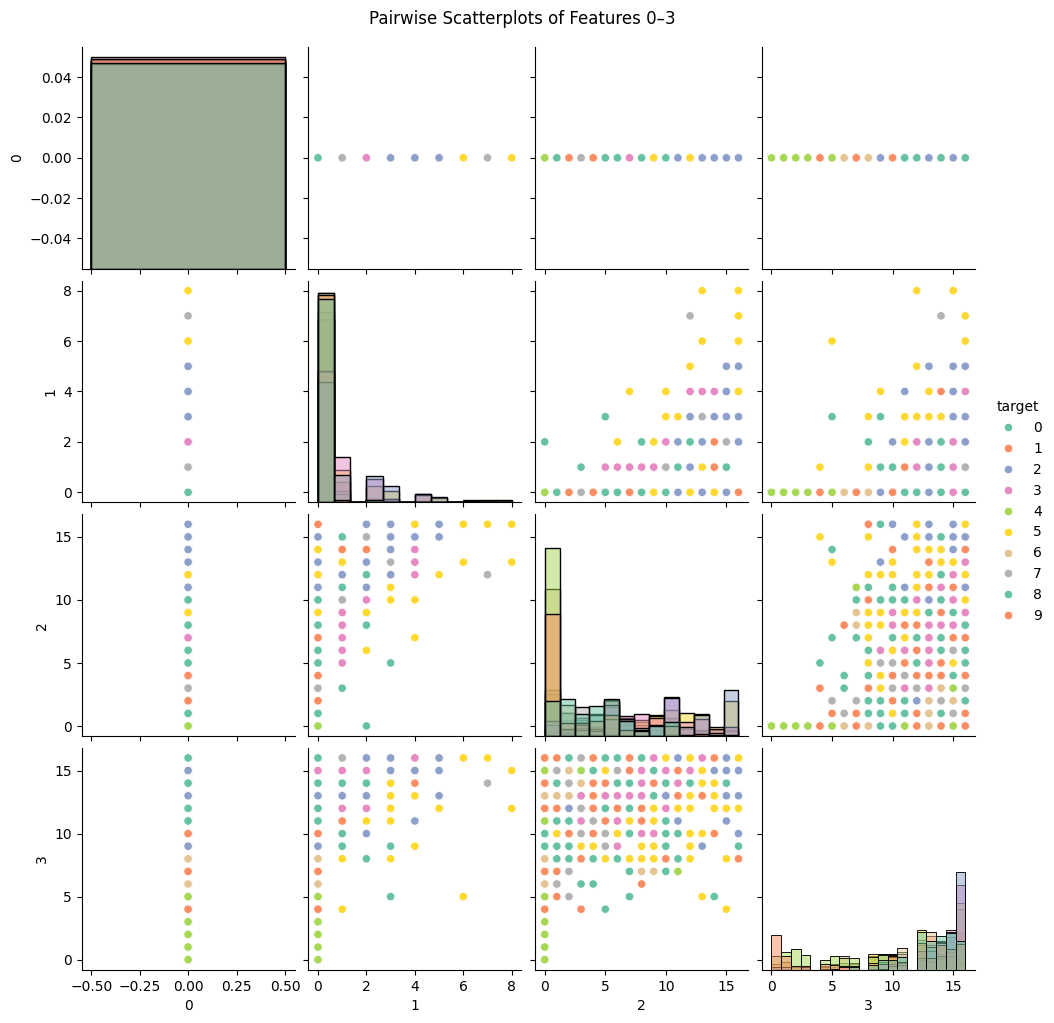

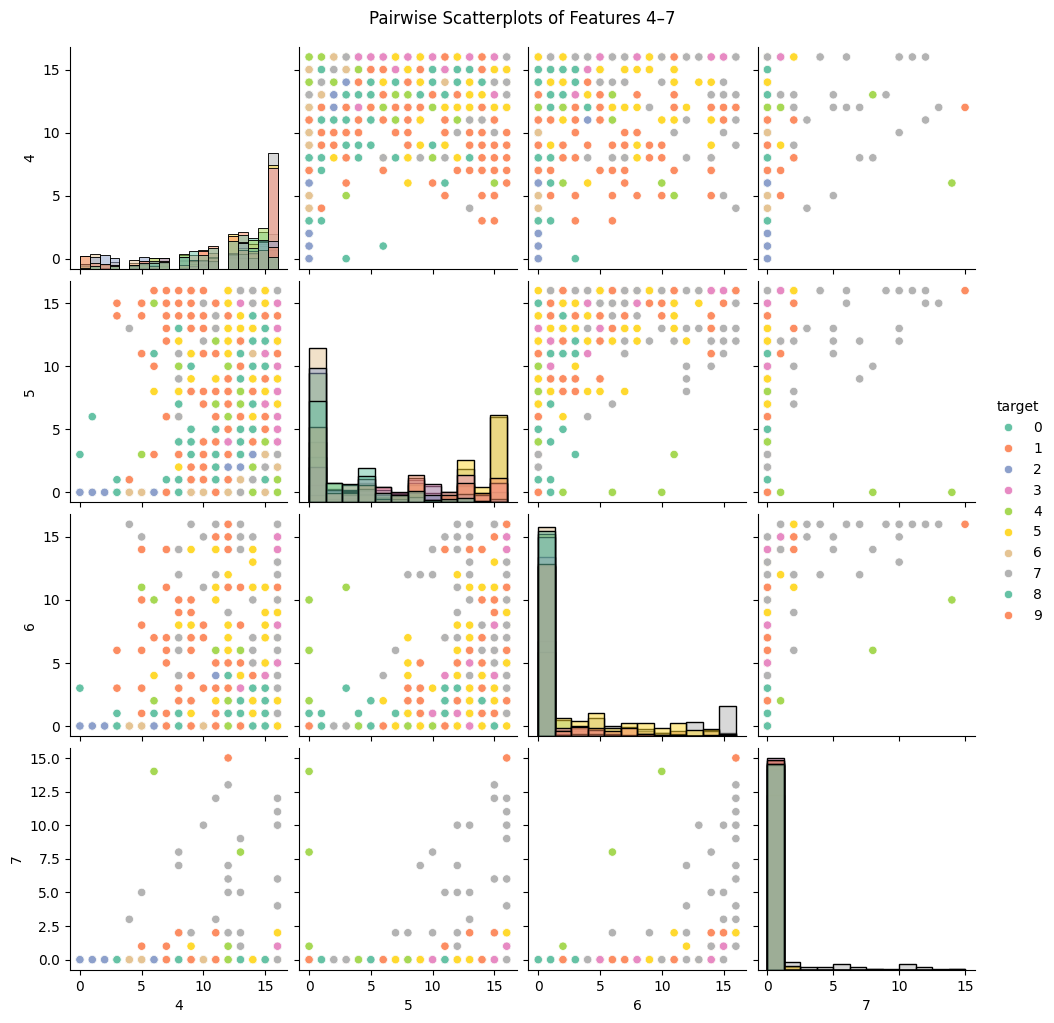

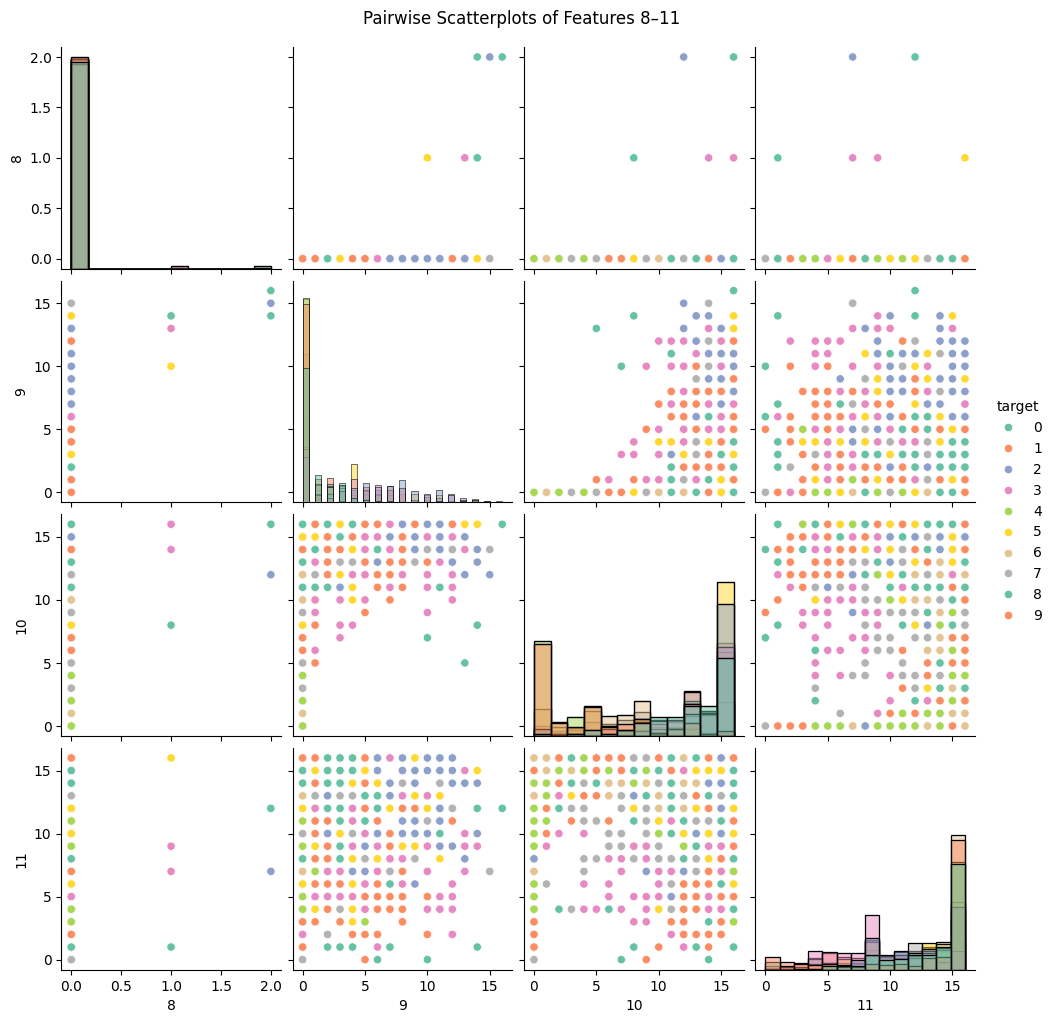

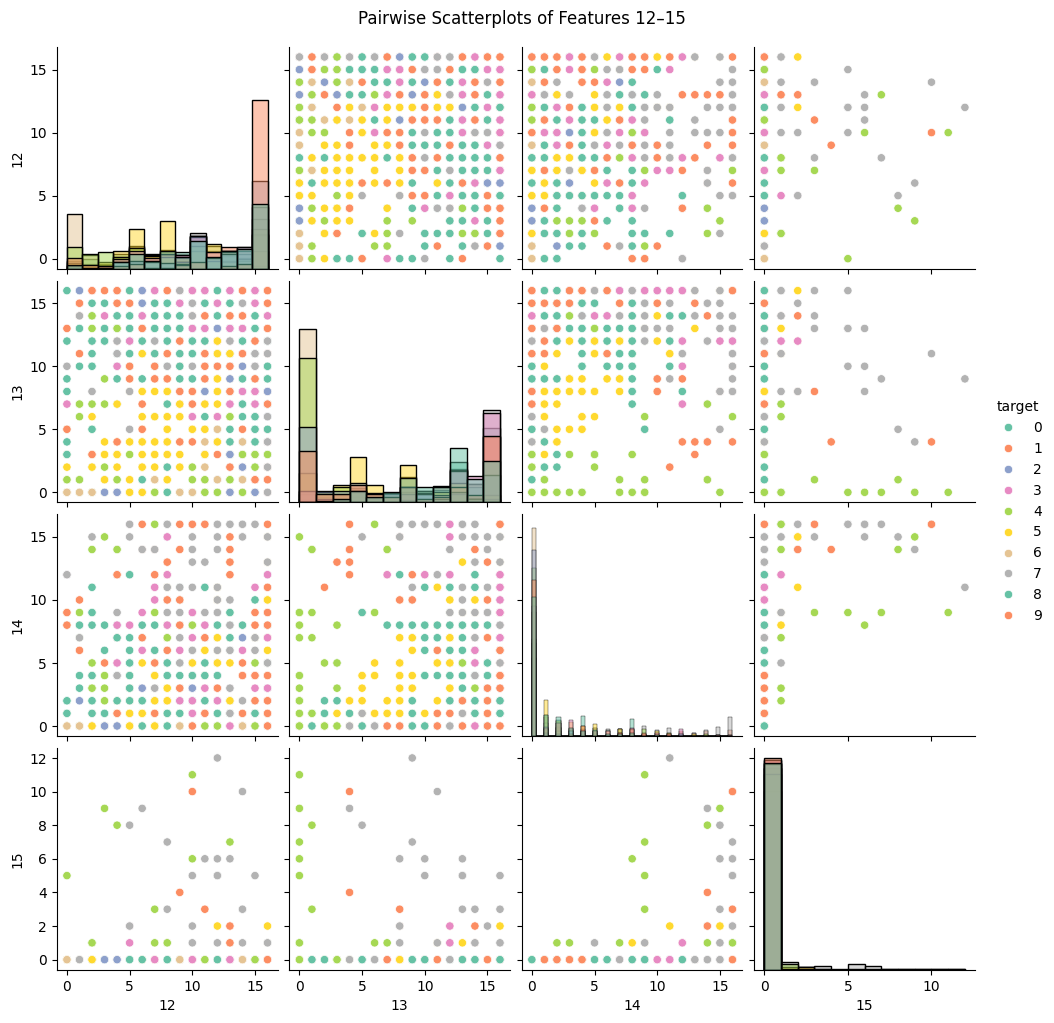

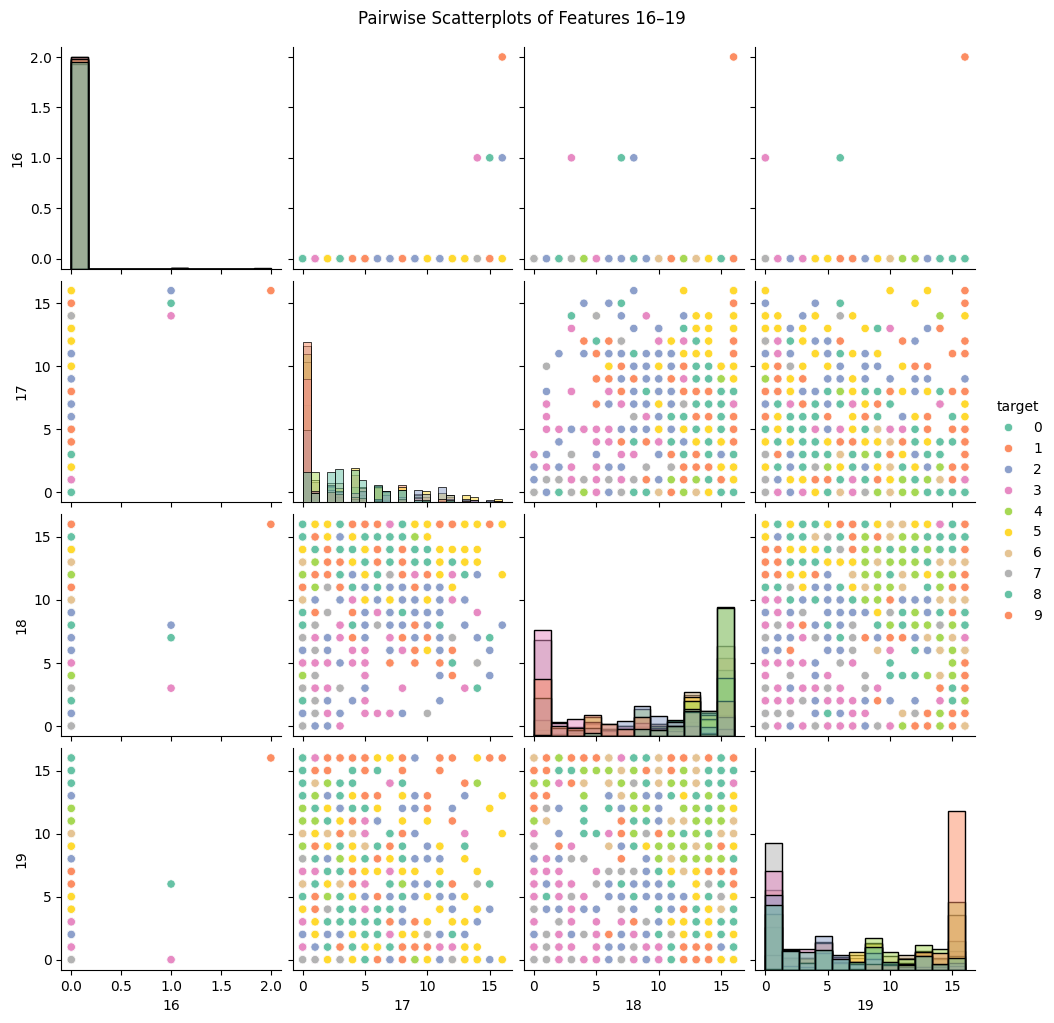

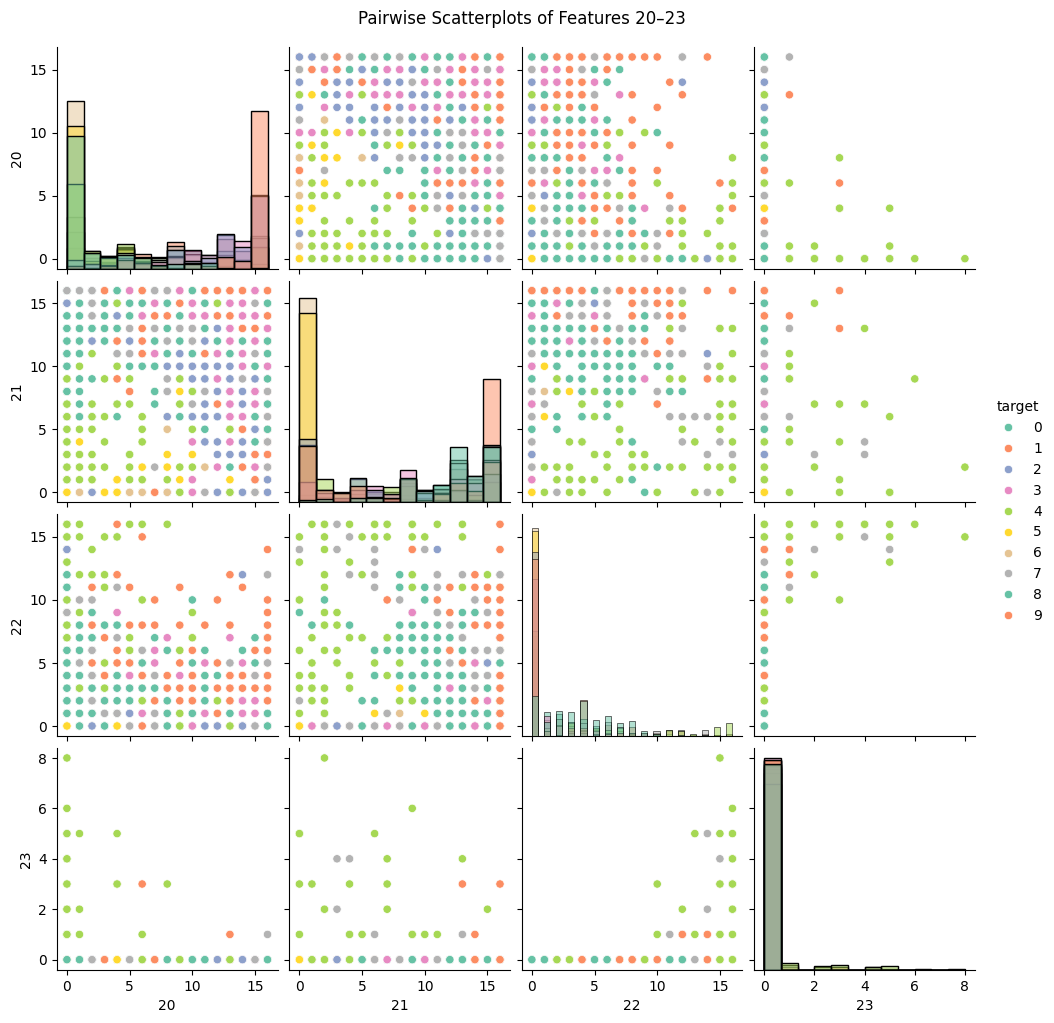

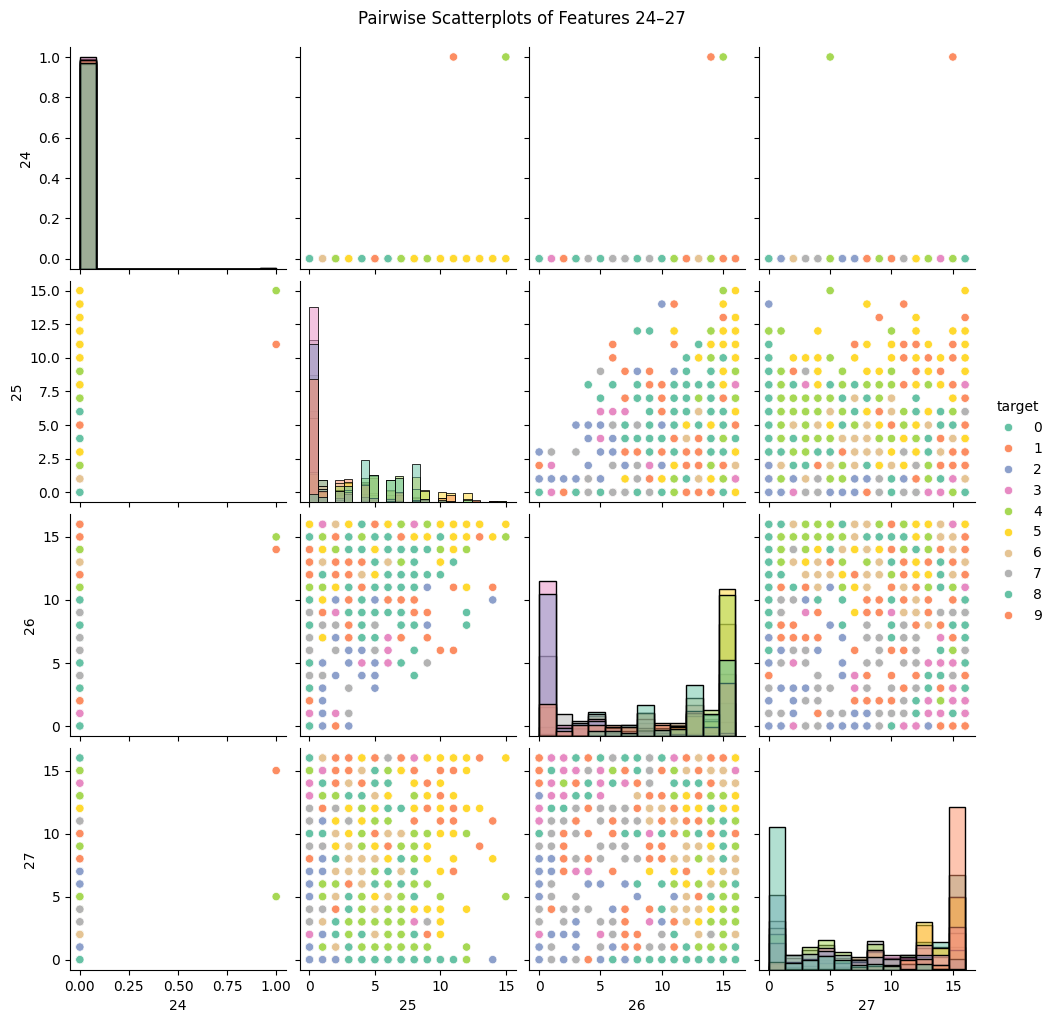

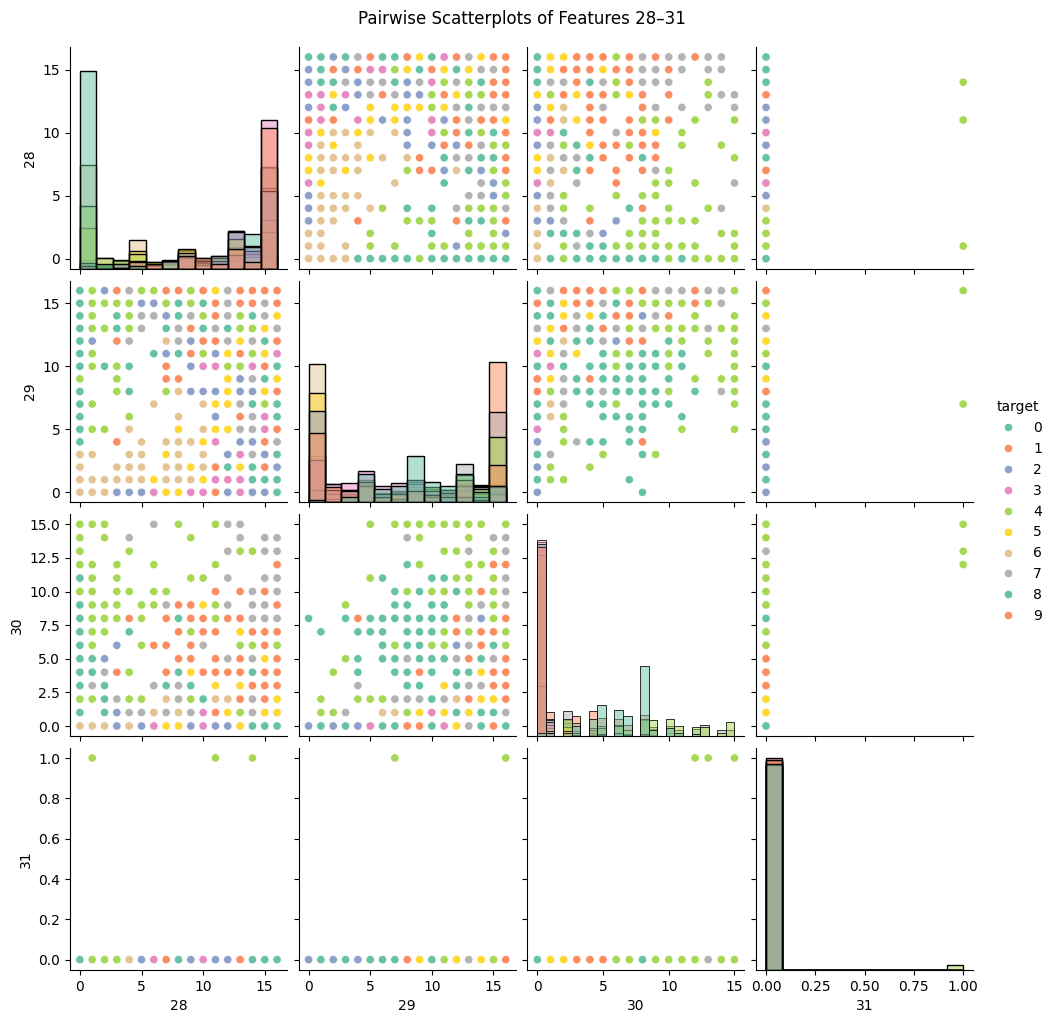

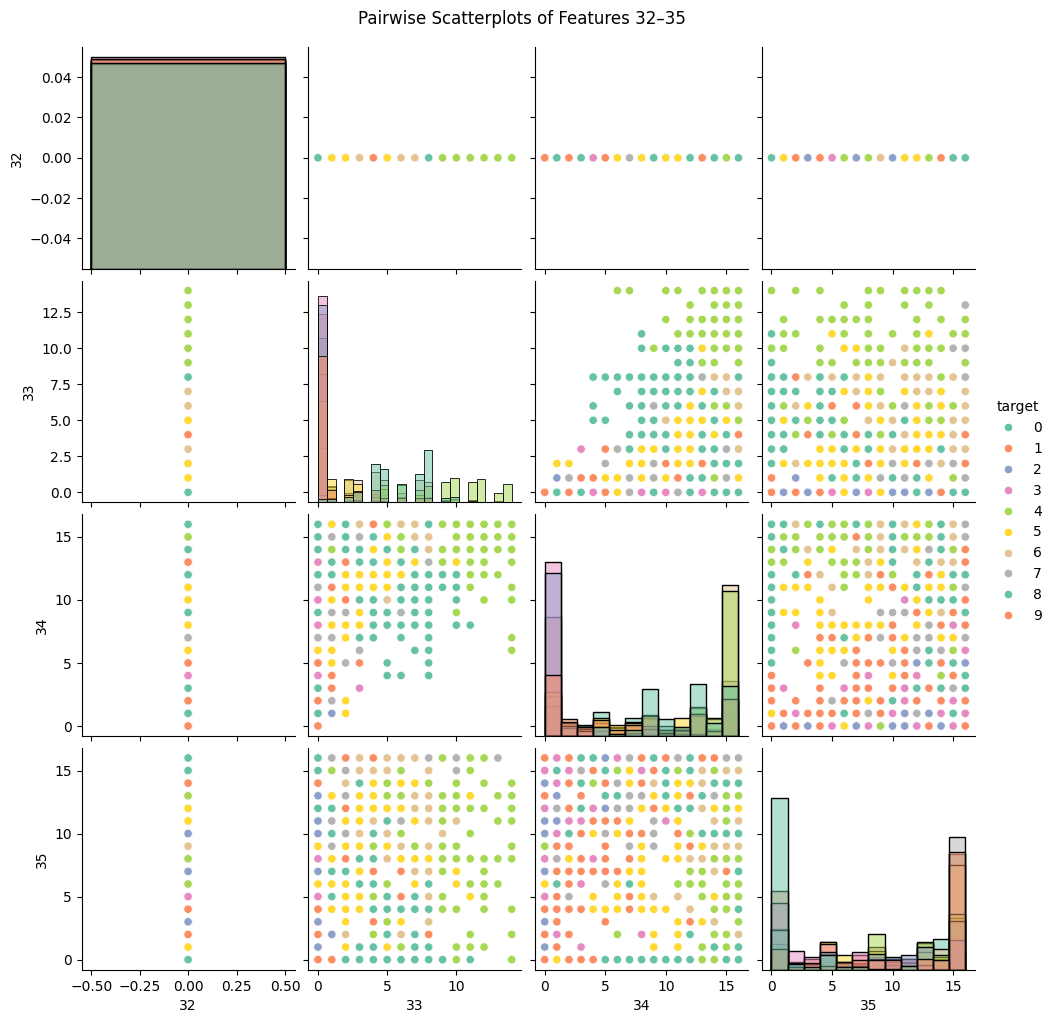

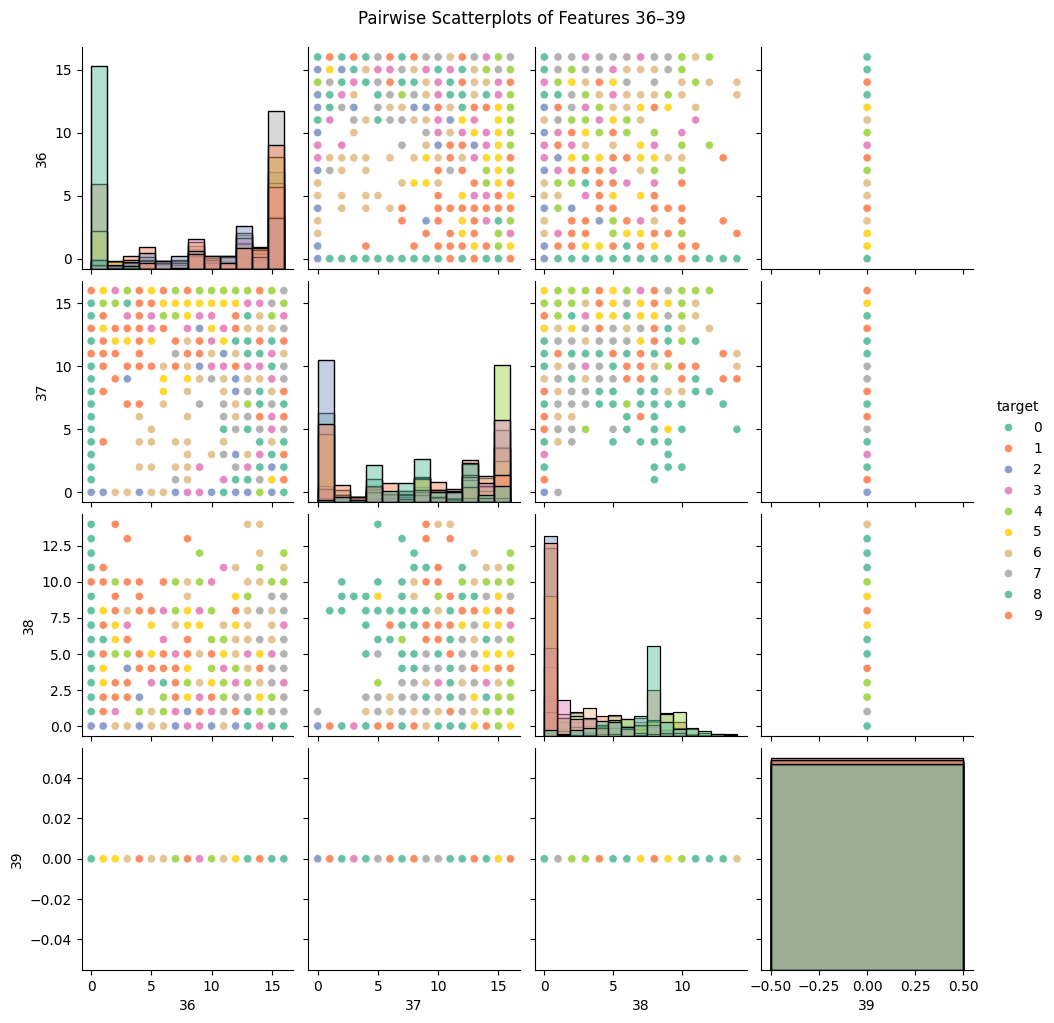

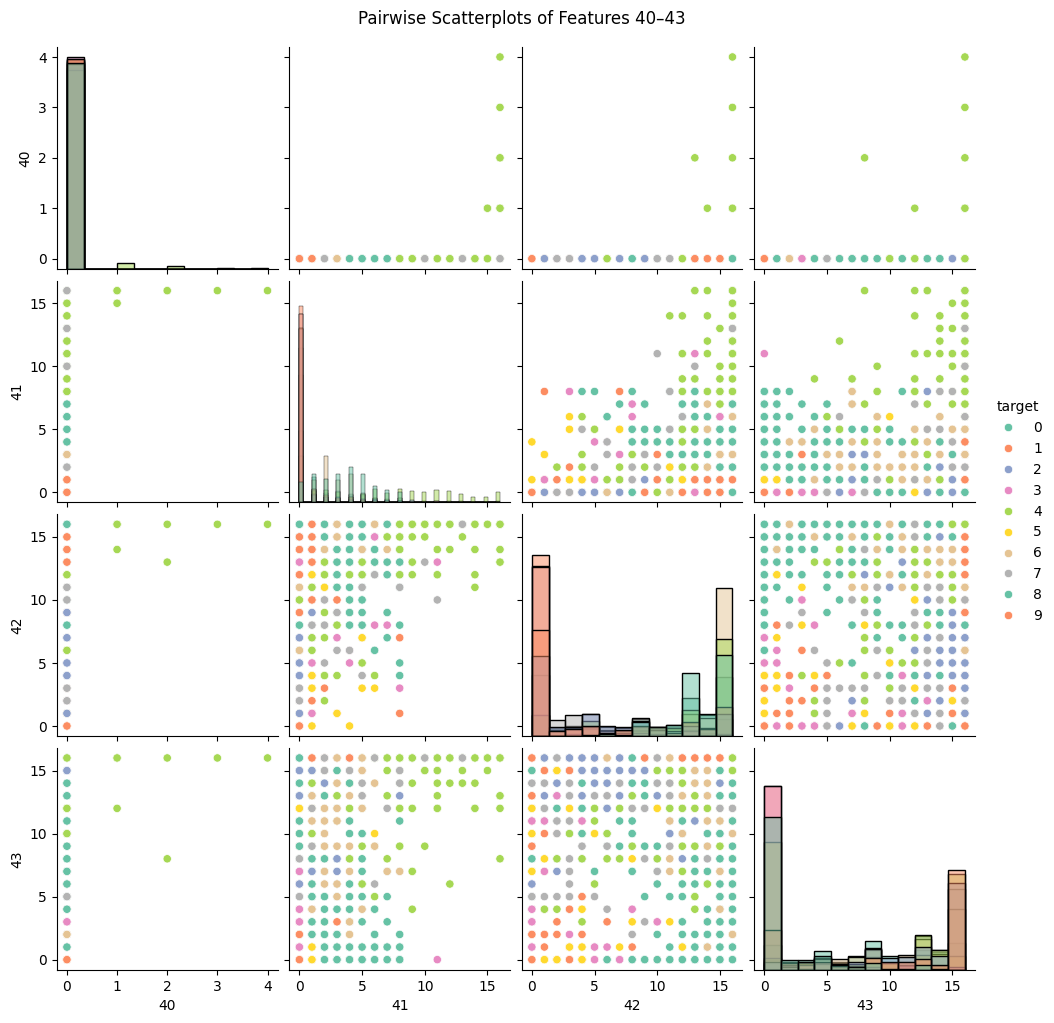

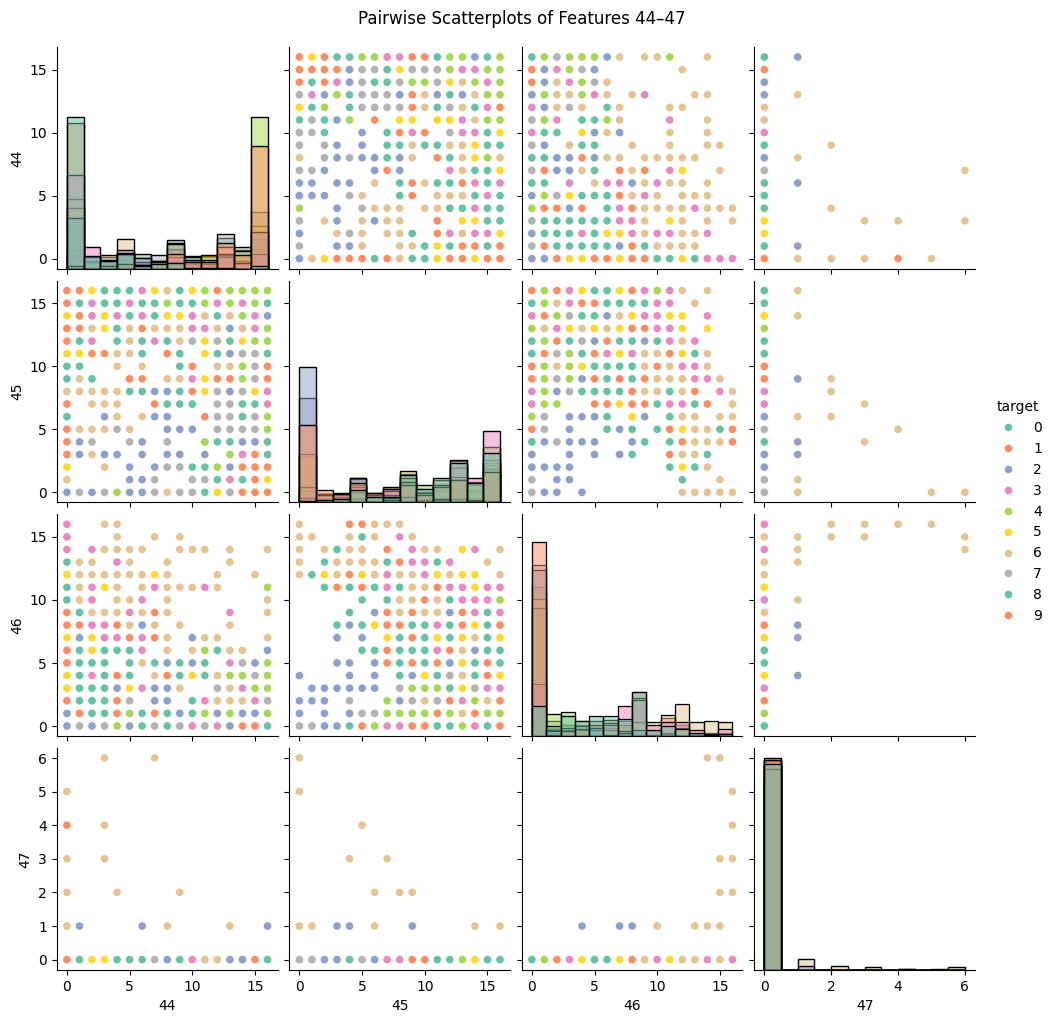

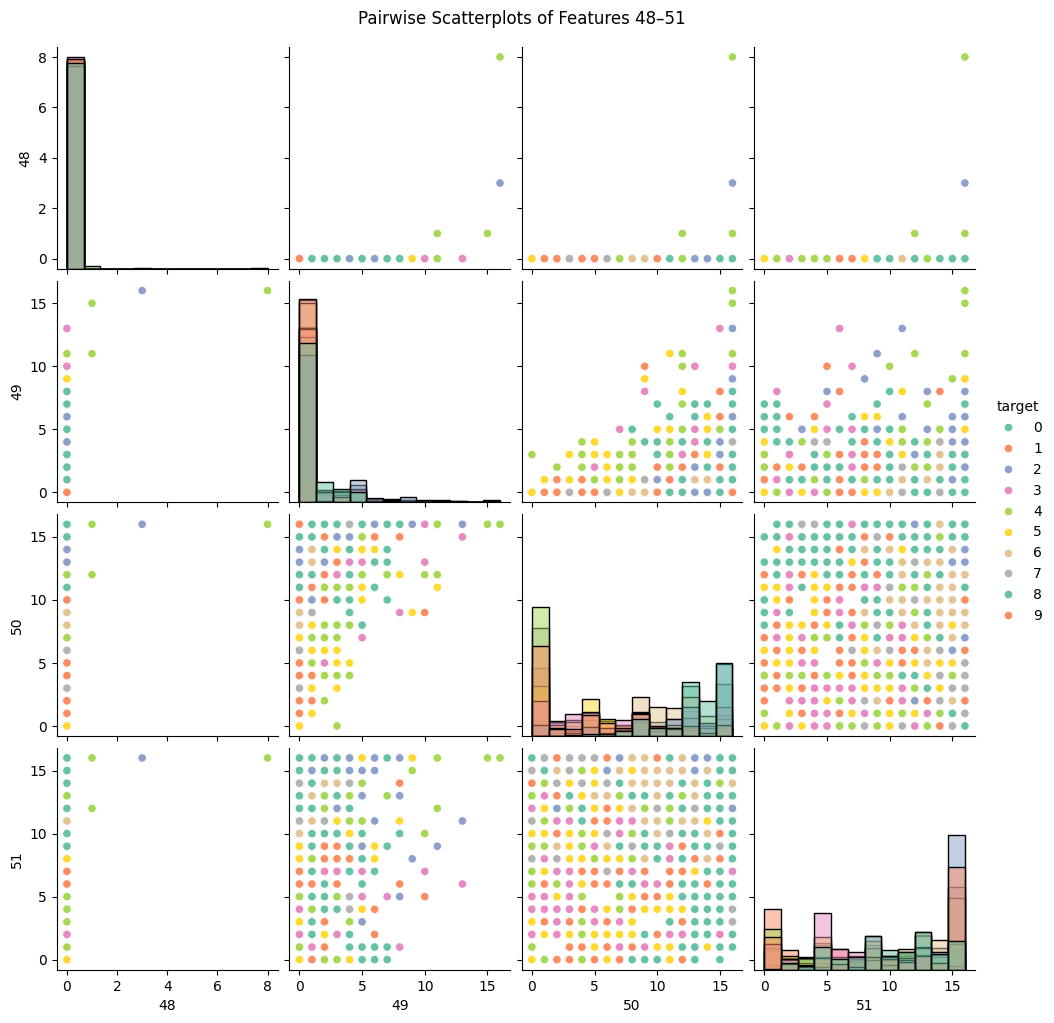

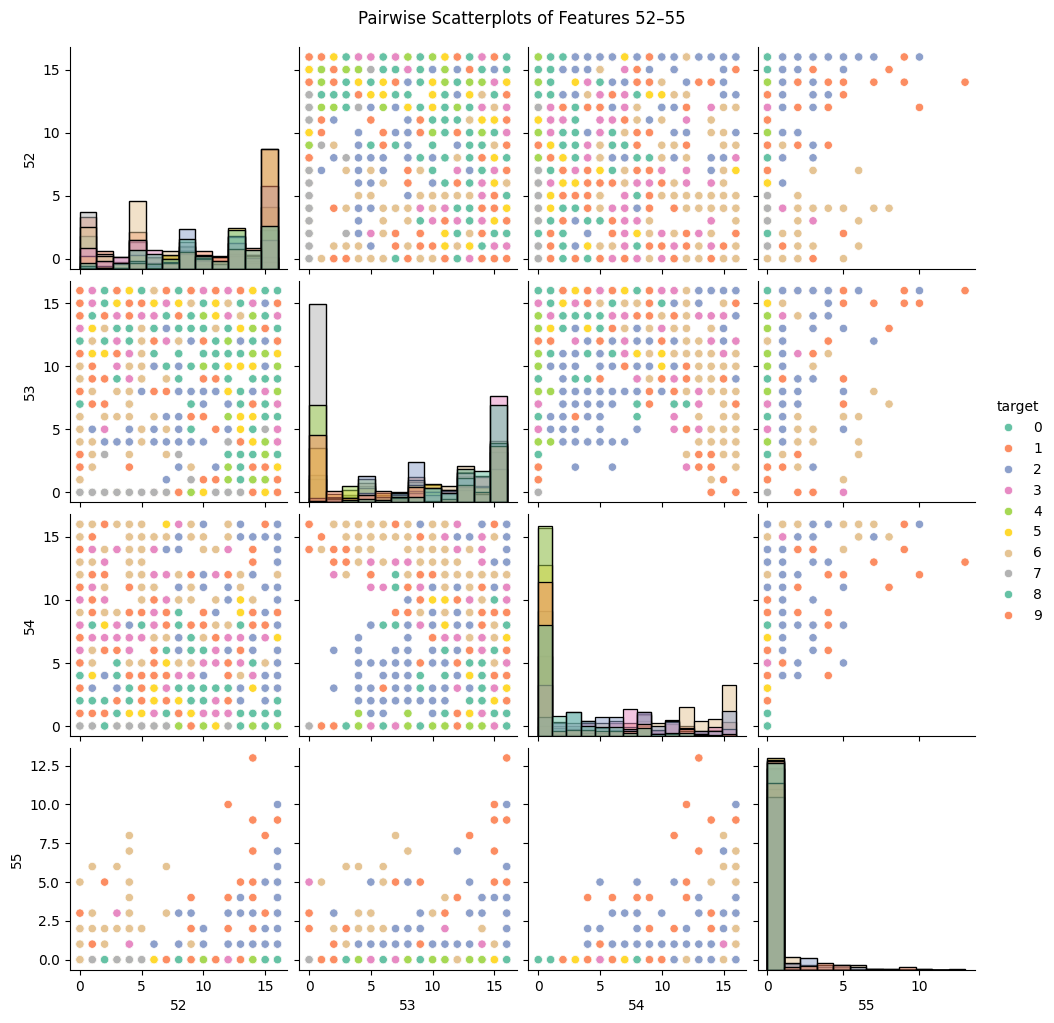

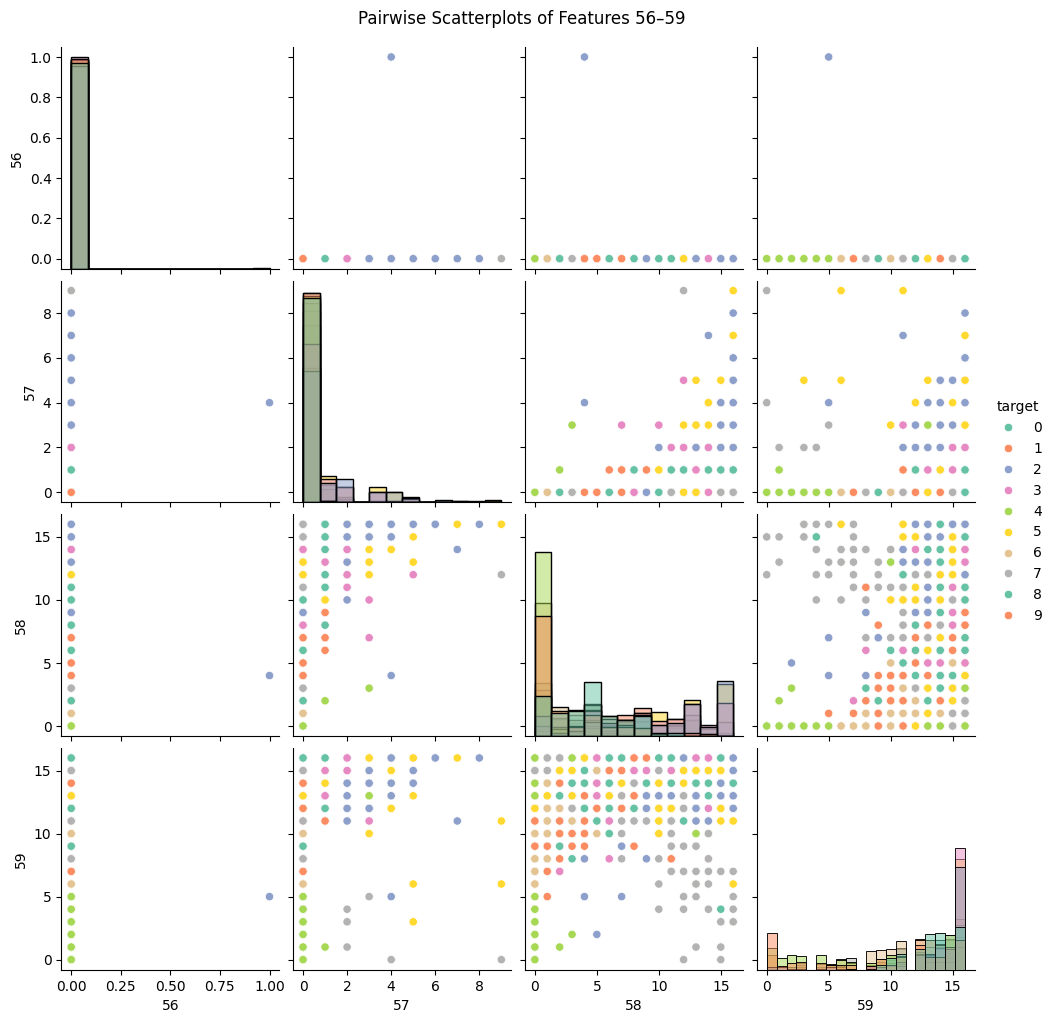

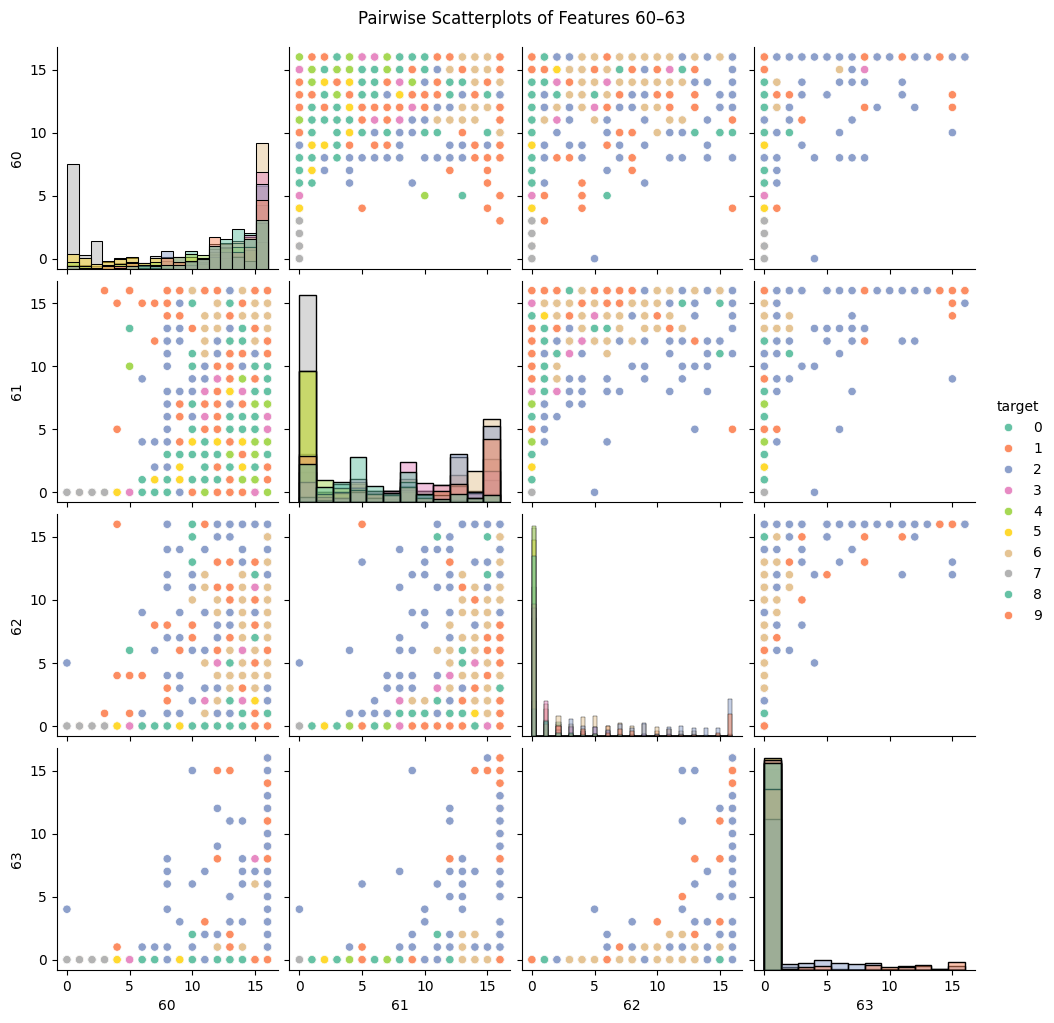

In [9]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target

# Group to 4 features per group)
group_size = 4
for start in range(0, 64, group_size):
    end = start + group_size
    subset = df.iloc[:, start:end]
    subset['target'] = df['target']

    sns.pairplot(subset, hue='target', diag_kind='hist', palette='Set2')
    plt.suptitle(f'Pairwise Scatterplots of Features {start}–{end-1}', y=1.02)
    plt.show()

## Pairwise Scatterplot Interpretation:

The 'digits' dataset has 64 features, which is too many for a simple scatterplot. We can transform the dataset in fewer dimensions with the help of 'Principal Component Analysis (PCA)'.


# Principal Component Analysis (PCA)

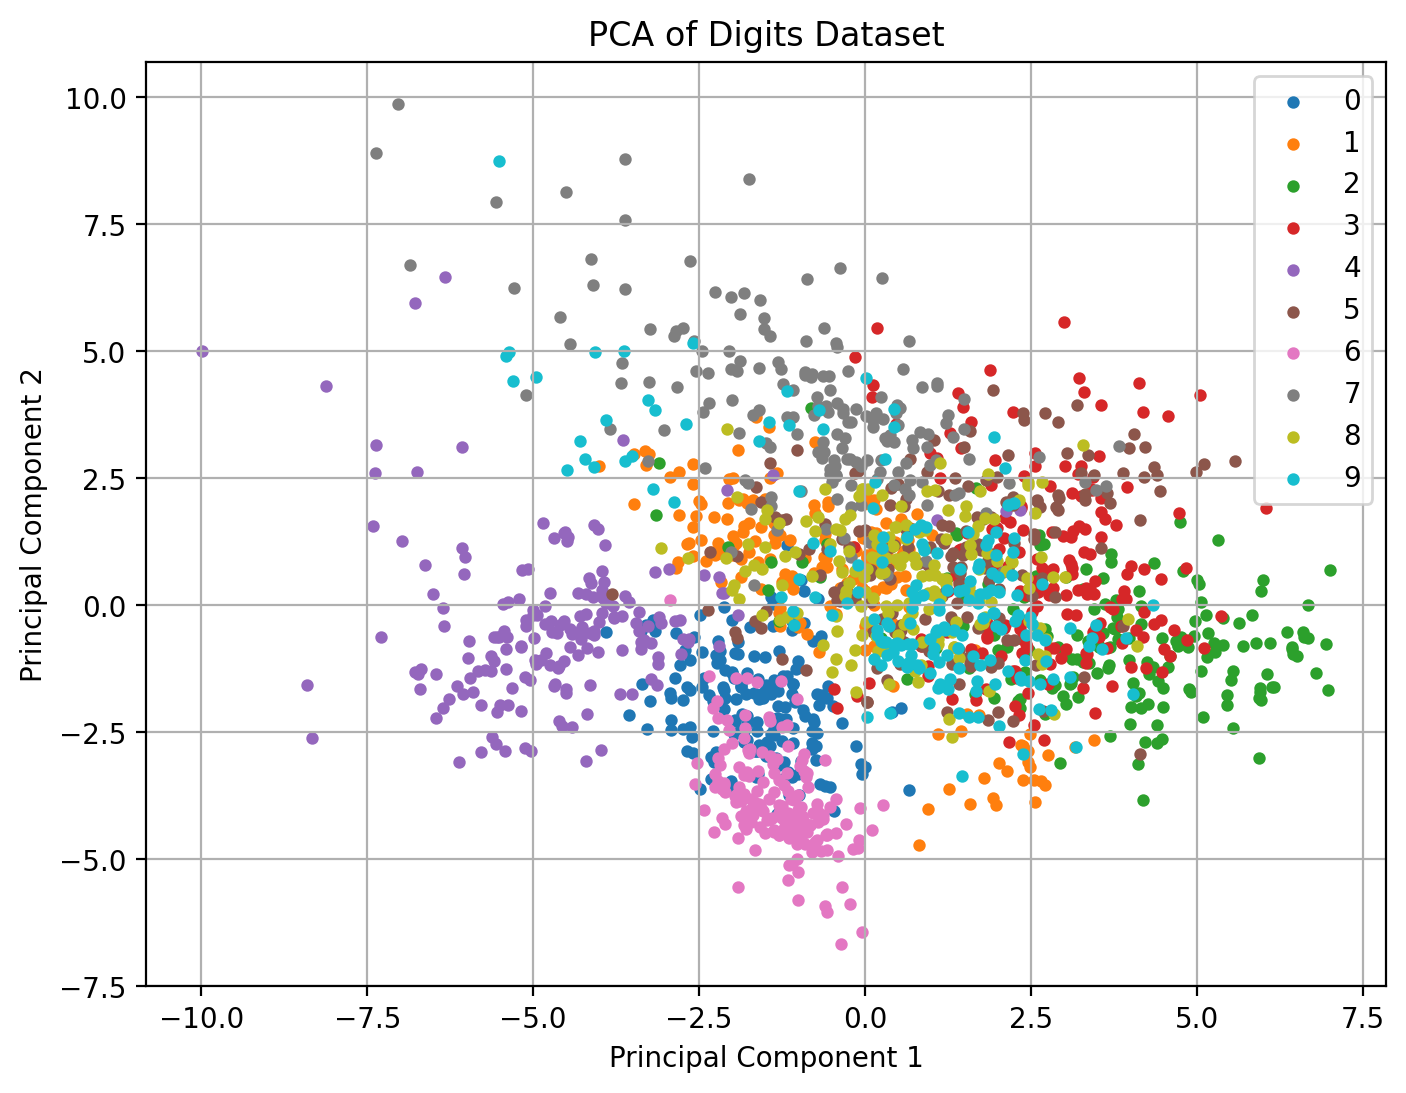

In [10]:
x=digits.data
y=digits.target
target_names=digits.target_names
X_scaled=StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
X_pca =pca.fit_transform(X_scaled)

df_pca=pd.DataFrame(data=X_pca,columns=['PC1','PC2'])
df_pca['target']=y

plt.figure(figsize=(8,6), dpi=200)
for i, target_name in enumerate(target_names):
    plt.scatter(df_pca[df_pca['target']==i]['PC1'],
                df_pca[df_pca['target']==i]['PC2'],
                label=target_name, s=12)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Digits Dataset')
plt.legend()
plt.grid(True)
plt.show(block=True)

## PCA Scatterplot Interpretation

The PCA successfully compresses 64 pixel features into two principal components while preserving the most important variations in the data. Although there is considerable overlap in the central region, several digit classes show distinct clustering patterns.                                  

----Digit 0 (blue), Digit 4 (purple), and Digit 6 (pink) demonstrate better seperation from the main cluster compared to other digits. 

----The central and right regions show substantial overlap among digits 1 (orange), 2 (green), 3 (red), 5 (brown), 7 (gray), 8 (lightgreen), and 9 (cyan). These classes occupy similar positions in the PCA space, with digits 2 (green) and 3 (red) particularly concentrated on the right side, while digits 7 (gray), 8 (lightgreen), and 9 (cyan) heavily overlap in the center. This clustering indicates they share structural similarities that cannot be fully resolved with only two components.